# The matplotlib library

## Importing the datascience libraries

```matplotlib``` is an abbreviation for the matrix plotting library. Normally ```numpy``` is imported alongside ```matplotlib``` as ```ndarray``` instances are used to store data for plotting. The three letter alias ```mpl``` is typically used for ```matplotlib``` and the ```pyplot``` module is normally imported using the three letter alias ```plt```:

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

The version can be determined using the datamodel attribute ```__version__```:

In [2]:
mpl.__version__

'3.8.2'

The custom function ```print_identifier_group``` can be imported:

In [3]:
from helper_module import print_identifier_group

And used to examine the identifiers of the ```mpl``` library:

In [4]:
print_identifier_group(mpl, kind='all', exclude_std=True)

datamodel attribute: ['__all__', '__bibtex__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__']
datamodel method: ['__getattr__']
constant: []
attribute: ['artist', 'axes', 'axis', 'backend_bases', 'backend_managers', 'backend_tools', 'bezier', 'category', 'cbook', 'cm', 'collections', 'color_sequences', 'colorbar', 'colors', 'container', 'contour', 'dates', 'defaultParams', 'dviread', 'figure', 'font_manager', 'ft2font', 'gridspec', 'hatch', 'image', 'inspect', 'layout_engine', 'legend', 'legend_handler', 'lines', 'logging', 'markers', 'mathtext', 'mlab', 'numpy', 'offsetbox', 'patches', 'path', 'projections', 'pyplot', 'quiver', 'rcParams', 'rcParamsDefault', 'rcParamsOrig', 'rcsetup', 'scale', 'spines', 'stackplot', 'streamplot', 'style', 'sys', 'table', 'texmanager', 'text', 'textpath', 'ticker', 'transforms', 'tri', 'units', 'widgets']
method/function: ['colormaps', 'cycler', 'get_backend', 'get_cachedir', 'get_c

The ```mpl``` library has a large number of modules, many of the modules are Python standard libraries which are used internally by ```mpl``` functions and have been excluded in the output above. ```mpl``` also uses third-party libraries such as ```numpy``` internally. When ```np``` is used by the end user, it is typically imported separately using the alias ```np```:

```python
import numpy as np
```

Although the following would be equivalent, it is not typically accessed the long way via ```mpl```:

```python
import matplotlib.numpy as np
```

The ```ndarray``` is used as the default datastructure for simple plots. The simple plots use a 1D ```ndarray``` however more advanced plots are configured to use higher dimension ```ndarray``` instances.

A simple plot requires ```y``` values measured at respect to ```x``` values. ```y``` is known as the dependent variable and ```x``` is known as the dependent variable. Notice that the independent ```x``` measurements are taken at linearly spaced intervals. The ```y``` values taken at these values of ```x``` have some associated error:

In [5]:
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0.001, 2.001, 3.999, 5.999, 8.002, 10.001])

```mpl``` was originally a Python plotting library based on MATLAB. During early development there were ```mlab``` and ```pylab``` modules which had function names equivalent to functions found in MATLAB. Functions from these modules were typically imported into the global namespace and used like they are in MATLAB however importing all the functions in the global namespace and overriding the ```builtins``` functions is considered bad practice and goes against the Object Orientated Programming Principles (OOP) commonly adopted in Python. The Python plot ```pyplot``` module updated most of these plotting functions using OOP principles. The ```pyplot``` module is imported using the alias ```plt``` and now that the ```mpl``` library is mature is the main module used. The ```mlab``` module now only contains a small number of specialised function for spectral computations and kernel density estimations that aren't yet incorporated into ```pyplot```.

The identifiers for the ```pyplot``` module can be examined:

In [6]:
print_identifier_group(plt, kind='all', exclude_std=True)

datamodel attribute: ['__annotations__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__']
datamodel method: []
constant: ['TYPE_CHECKING']
attribute: ['annotations', 'cbook', 'cm', 'color_sequences', 'matplotlib', 'mlab', 'np', 'rcParams', 'rcParamsDefault', 'rcParamsOrig', 'rcsetup', 'style']
method/function: ['acorr', 'angle_spectrum', 'annotate', 'arrow', 'autoscale', 'autumn', 'axes', 'axhline', 'axhspan', 'axis', 'axline', 'axvline', 'axvspan', 'bar', 'bar_label', 'barbs', 'barh', 'bone', 'box', 'boxplot', 'broken_barh', 'cast', 'cla', 'clabel', 'clf', 'clim', 'close', 'cohere', 'colorbar', 'colormaps', 'connect', 'contour', 'contourf', 'cool', 'copper', 'csd', 'cycler', 'delaxes', 'disconnect', 'draw', 'draw_all', 'draw_if_interactive', 'ecdf', 'errorbar', 'eventplot', 'figaspect', 'figimage', 'figlegend', 'fignum_exists', 'figtext', 'figure', 'fill', 'fill_between', 'fill_betweenx', 'findobj', 'flag', 'gca', 'gcf', 'gci', 

The most important classes are ```plt.Figure``` and ```plt.Axes```:

In [7]:
print_identifier_group(plt.Figure, kind='all')

datamodel attribute: ['__dict__', '__doc__', '__module__', '__weakref__']
datamodel method: ['__class__', '__delattr__', '__dir__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__']
constant: []
attribute: ['axes', 'dpi', 'frameon', 'mouseover', 'stale', 'sticky_edges', 'zorder']
method/function: ['add_artist', 'add_axes', 'add_axobserver', 'add_callback', 'add_gridspec', 'add_subfigure', 'add_subplot', 'align_labels', 'align_xlabels', 'align_ylabels', 'autofmt_xdate', 'clear', 'clf', 'colorbar', 'contains', 'convert_xunits', 'convert_yunits', 'delaxes', 'draw', 'draw_artist', 'draw_without_rendering', 'figimage', 'findobj', 'format_cursor_data', 'gca', 'get_agg_filter', 'get_alpha', 'get_animated', 'get_axes', 'get_children', 'get_clip_box', 'get_clip_on

In [8]:
print_identifier_group(plt.Axes, kind='all')

datamodel attribute: ['__dict__', '__doc__', '__module__', '__weakref__']
datamodel method: ['__class__', '__delattr__', '__dir__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__']
constant: []
attribute: ['artists', 'axes', 'collections', 'images', 'lines', 'mouseover', 'name', 'patches', 'stale', 'sticky_edges', 'tables', 'texts', 'use_sticky_edges', 'viewLim', 'zorder']
method/function: ['acorr', 'add_artist', 'add_callback', 'add_child_axes', 'add_collection', 'add_container', 'add_image', 'add_line', 'add_patch', 'add_table', 'angle_spectrum', 'annotate', 'apply_aspect', 'arrow', 'autoscale', 'autoscale_view', 'axhline', 'axhspan', 'axis', 'axline', 'axvline', 'axvspan', 'bar', 'bar_label', 'barbs', 'barh', 'boxplot', 'broken_barh', 'bxp', 'can_pan'

These classes are typically not instantiated directly. The ```pyplot``` factory function ```plt.figure``` is used to create a ```plt.Figure``` instance:

In [9]:
plt.figure?

Signature:
plt.figure(
    num: 'int | str | Figure | SubFigure | None' = None,
    figsize: 'tuple[float, float] | None' = None,
    dpi: 'float | None' = None,
    *,
    facecolor: 'ColorType | None' = None,
    edgecolor: 'ColorType | None' = None,
    frameon: 'bool' = True,
    FigureClass: 'type[Figure]' = <class 'matplotlib.figure.Figure'>,
    clear: 'bool' = False,
    **kwargs,
) -> 'Figure'
Docstring:
Create a new figure, or activate an existing figure.

Parameters
----------
num : int or str or `.Figure` or `.SubFigure`, optional
    A unique identifier for the figure.

    If a figure with that identifier already exists, this figure is made
    active and returned. An integer refers to the ``Figure.number``
    attribute, a string refers to the figure label.

    If there is no figure with the identifier or *num* is not given, a new
    figure is created, made active and returned.  If *num* is an int, it
    will be used for the ``Figure.number`` attribute, otherwise, an


Notice that this factory function returns a ```plt.Figure```. 

There are generally 2 approaches, a functional approach where the current ```plt.Figure``` is not assigned to an instance name during instantiation and is instead updated using a series of functions from the ```plt```. For example:

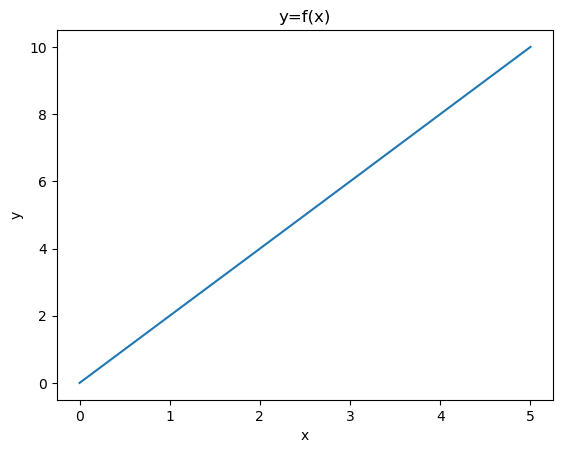

In [10]:
plt.figure()
plt.subplot(1, 1, 1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y=f(x)')
plt.plot(x, y)

Alternatively an OOP design approach is used:

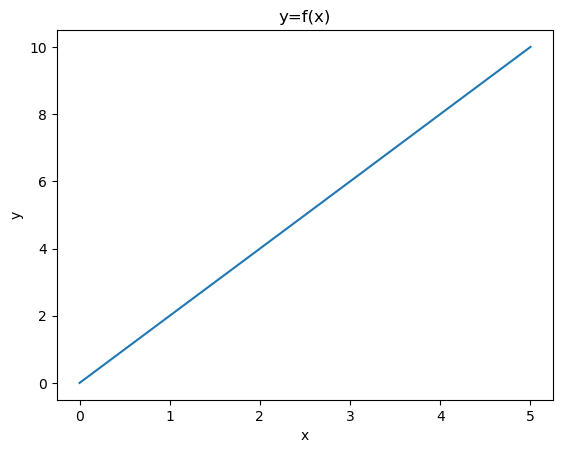

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x_text = ax.set_xlabel('x')
y_text = ax.set_ylabel('y')
title_text = ax.set_title('y=f(x)')
line_list = ax.plot(x, y)

Notice in the OOP design approach that the ```Axes``` is added using the ```Figure``` method ```add_subplot```. The labels are added to the ```Axes``` using the ```Axes``` methods ```set_xlabel```, ```set_ylabel``` and ```set_title``` respectively. These methods are similar to the ```plt``` functions ```xlabel```, ```ylabel``` and ```title``` which operate on the currently selected ```Axes```.

Each plotting function from ```plt``` is also available as an ```Axes``` method with the same name. The class type of all the instances above can be examined:

In [12]:
print(f'{fig}: {type(fig)}')
print(f'{ax}: {type(ax)}')
print(f'{x_text}: {type(x_text)}')
print(f'{y_text}: {type(y_text)}')
print(f'{title_text}: {type(title_text)}')
print(f'{line_list}: {type(line_list)}')
print(f'{line_list[0]}: {type(line_list[0])}')

Figure(640x480): <class 'matplotlib.figure.Figure'>
Axes(0.125,0.11;0.775x0.77): <class 'matplotlib.axes._axes.Axes'>
Text(0.5, 24.0, 'x'): <class 'matplotlib.text.Text'>
Text(24.000000000000007, 0.5, 'y'): <class 'matplotlib.text.Text'>
Text(0.5, 1.0, 'y=f(x)'): <class 'matplotlib.text.Text'>
[<matplotlib.lines.Line2D object at 0x00000254AF8DFA10>]: <class 'list'>
Line2D(_child0): <class 'matplotlib.lines.Line2D'>


Notice when the functional approach is used, the return value of the last line in the cell is shown in the cell output above the plot:

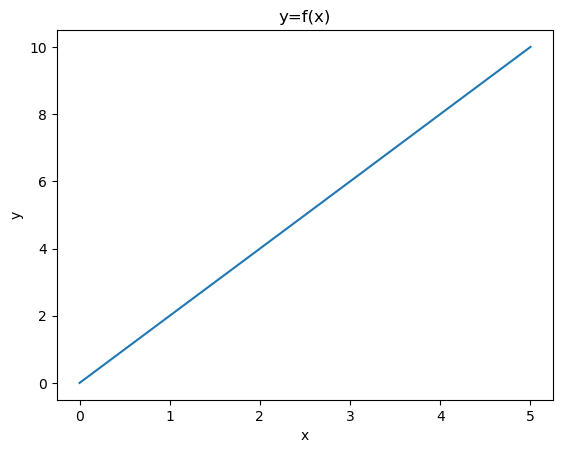

In [13]:
plt.figure()
plt.subplot(1, 1, 1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y=f(x)')
plt.plot(x, y)

This can be suppressed by use of a semicolon at the end of the last line:

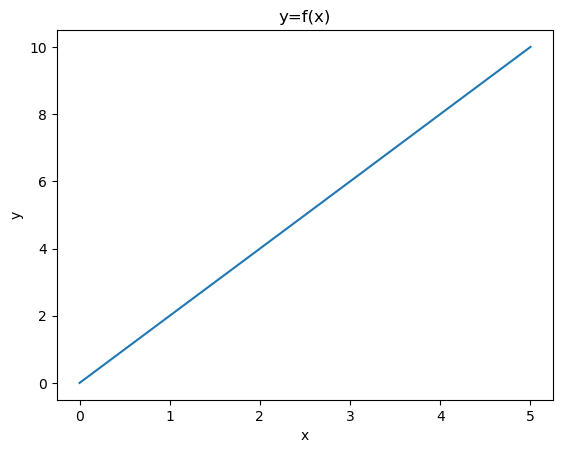

In [14]:
plt.figure()
plt.subplot(1, 1, 1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y=f(x)')
plt.plot(x, y);

The ```figure``` function is a factory function for creating a ```Figure``` instance. There is a complementary ```subplots``` function which creates both a ```Figure``` and ```Axes``` instance. In other words the following are equivalent:

Figure(640x480): <class 'matplotlib.figure.Figure'>
Axes(0.125,0.11;0.775x0.77): <class 'matplotlib.axes._axes.Axes'>


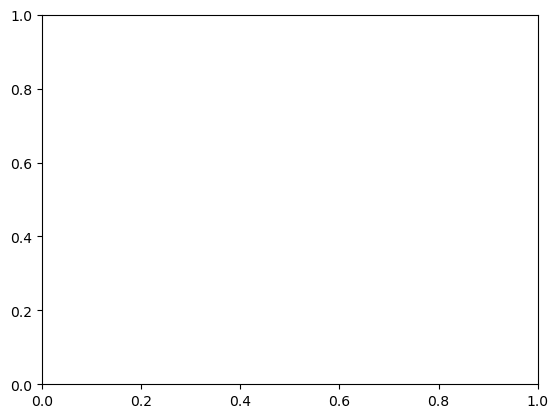

In [15]:
print(f'{fig}: {type(fig)}')
print(f'{ax}: {type(ax)}')
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

Figure(640x480): <class 'matplotlib.figure.Figure'>
Axes(0.125,0.11;0.775x0.77): <class 'matplotlib.axes._axes.Axes'>


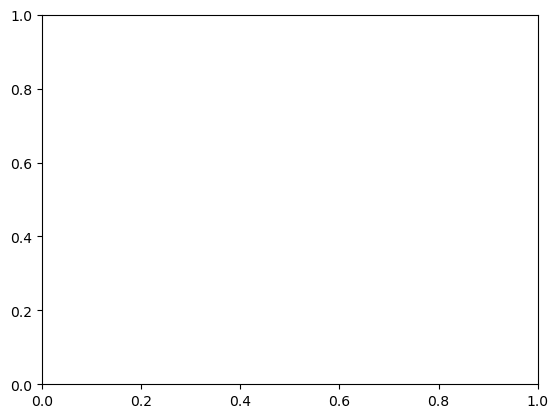

In [16]:
fig, ax = plt.subplots()
print(f'{fig}: {type(fig)}')
print(f'{ax}: {type(ax)}')

The factory function ```plt.subplots``` takes in consistent keyword input arguments to ```plt.Figure```, for example ```num``` which can be used to specify the ```Figure``` number. Normally each ```Figure``` instance has an ```int``` ```Figure``` number which is automatically assigned from 1 (first order indexing). This number is restarted for each cell output in an IPython cell.

The factory function ```plt.subplots``` also has keyword input arguments to specify the number of subplots to add. Notice when a single ```Axes``` is specified using ```nrows=1``` (default) by ```ncols=1``` (default) the return value is a single ```Axes``` instance. When a 1d array of ```Axes``` is specified, the return value is a 1D ```ndarray``` of ```Axes``` instances. When a 2d array of ```Axes``` is specified, the return value is a 2D ```ndarray```. Because these are ```ndarray``` instances they can be indexed into using zero-order indexing:

Figure(640x480): <class 'matplotlib.figure.Figure'>
[<Axes: > <Axes: >]: <class 'numpy.ndarray'>
Figure(640x480): <class 'matplotlib.figure.Figure'>
[<Axes: > <Axes: > <Axes: >]: <class 'numpy.ndarray'>
Figure(640x480): <class 'matplotlib.figure.Figure'>
[[<Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: >]]: <class 'numpy.ndarray'>


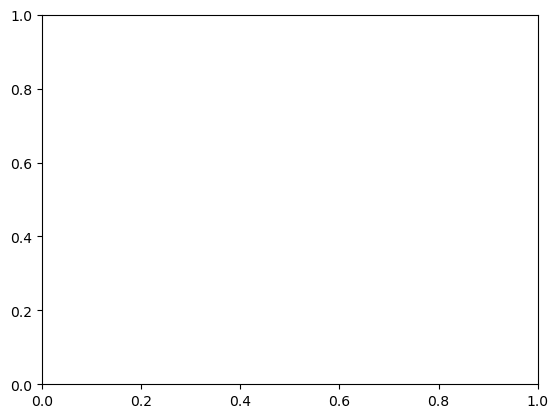

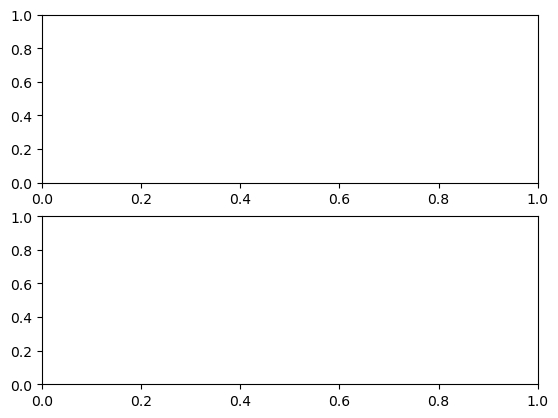

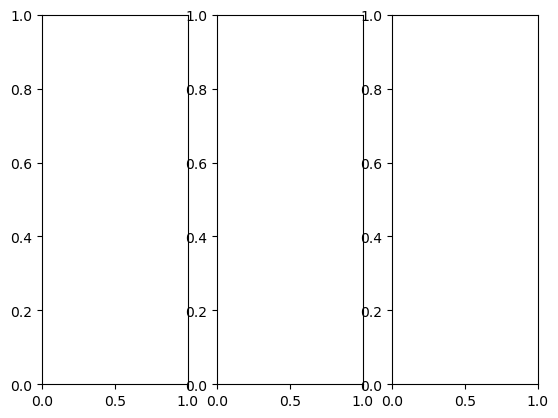

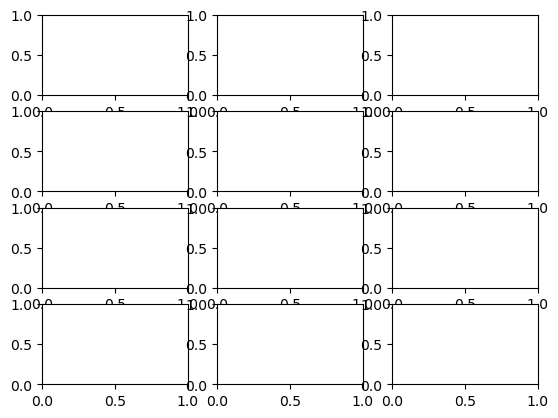

In [17]:
fig1, ax1 = plt.subplots(num=1)

fig2, ax2 = plt.subplots(num=2, nrows=2, ncols=1)
print(f'{fig2}: {type(fig2)}')
print(f'{ax2}: {type(ax2)}')

fig3, ax3 = plt.subplots(num=3, nrows=1, ncols=3)
print(f'{fig3}: {type(fig3)}')
print(f'{ax3}: {type(ax3)}')

fig4, ax4 = plt.subplots(num=4, nrows=4, ncols=3)
print(f'{fig4}: {type(fig4)}')
print(f'{ax4}: {type(ax4)}')

Having the ```Figure``` and ```Axes``` instances instantiated to instance names means they can be indexed into to select an ```Axes``` and then an ```Axes``` method such as a plotting function can be used:

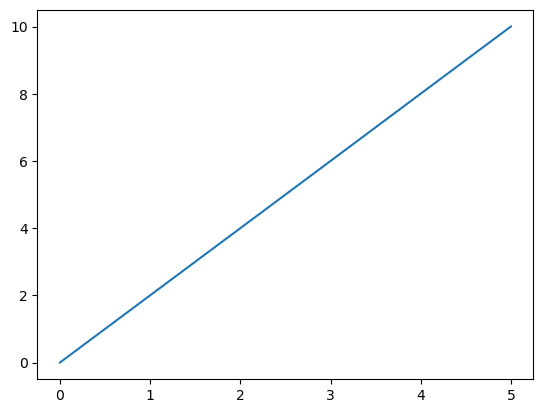

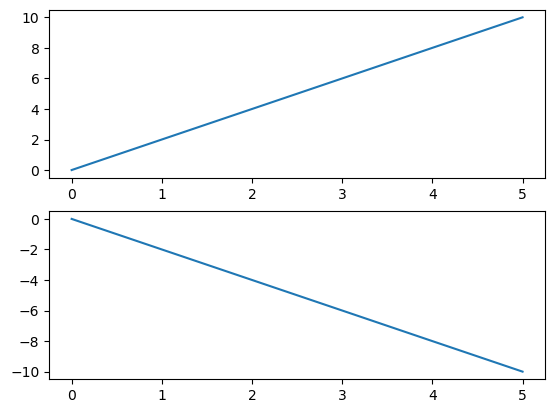

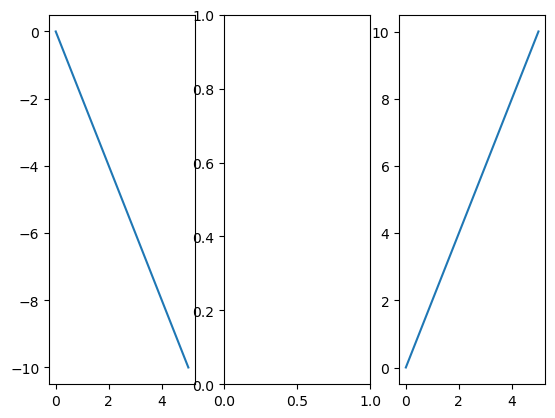

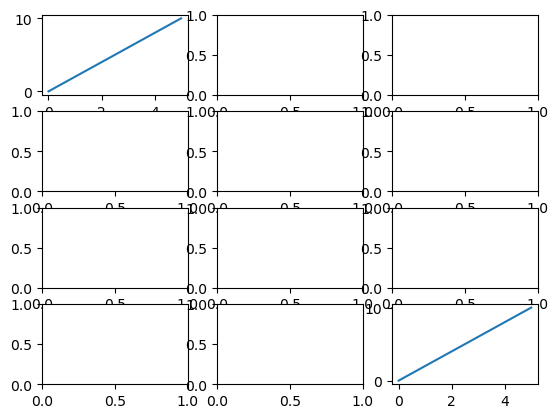

In [18]:
fig1, ax1 = plt.subplots()

fig2, ax2 = plt.subplots(nrows=2, ncols=1)

fig3, ax3 = plt.subplots(nrows=1, ncols=3)

fig4, ax4 = plt.subplots(nrows=4, ncols=3)

ax1.plot(x, y)
ax2[0].plot(x, y)
ax2[1].plot(x, -y)
ax3[0].plot(x, -y)
ax3[2].plot(x, y)
ax4[0, 0].plot(x, y)
ax4[3, 2].plot(x, y)

The function ```plt.subplot``` has the positional input arguments ```nrow```, ```ncol``` and ```index```. For the index first-order indexing is used. Typically each subplot is selected and then the ```plt``` plotting functions for example can be used to create a plot. Notice that ```plt.subplot``` can be used to reselect a subplot and so the last line is added to the first subplot:

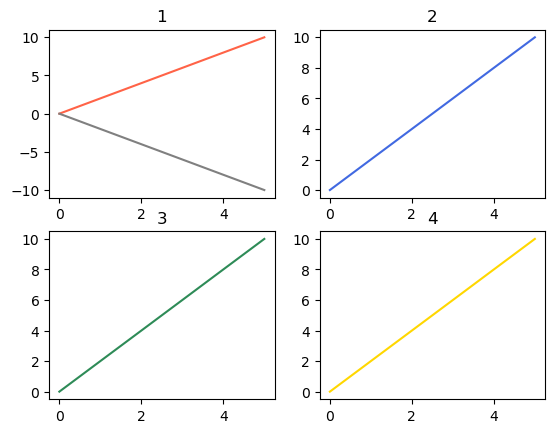

In [19]:
plt.figure()
plt.subplot(2, 2, 1)
plt.title('1')
plt.plot(x, y, color='tomato')

plt.subplot(2, 2, 2)
plt.title('2')
plt.plot(x, y, color='royalblue')

plt.subplot(2, 2, 3)
plt.title('3')
plt.plot(x, y, color='seagreen')

plt.subplot(2, 2, 4)
plt.title('4')
plt.plot(x, y, color='gold')

plt.subplot(2, 2, 1)
plt.plot(x, -y, color='gray')

If the functional approach was initially used the ```plt.gcf``` (get current Figure) function can be used to assign the currently selected ```Figure``` for assignment to an instance name. Once the ```Figure``` is selected there is a ```Figure``` method ```gca``` (get current Axes) or function ```plt.gca``` which can be used for assignment of an ```Axes``` to an instance name.

The ```Figure``` has an ```ax``` attribute which is (always) a ```list``` of ```Axes``` instances and this can be indexed into to access an ```Axes```. Each time a new ```Axes``` is added to the ```Figure``` it is appended to this ```list```, in other words the ```list``` follows the insertion order.

The ```Axes``` also has a ```figure``` attribute which can be used to instantiate a ```Figure```.


Figure(640x480): <class 'matplotlib.figure.Figure'>
Axes(0.125,0.11;0.775x0.77): <class 'matplotlib.axes._axes.Axes'>

[<Axes: title={'center': '1'}>]: <class 'list'>

Figure(640x480): <class 'matplotlib.figure.Figure'>


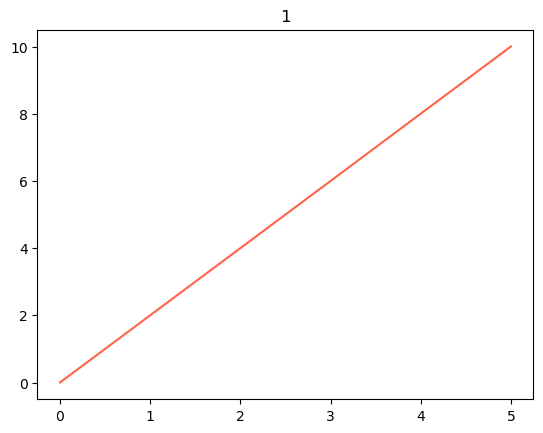

In [20]:
plt.figure()
plt.title(1)
plt.subplot(1, 1, 1)
plt.plot(x, y, color='tomato')

fig = plt.gcf()
ax = fig.gca()
print(f'{fig}: {type(fig)}')
print(f'{ax}: {type(ax)}')
print()
print(f'{fig.axes}: {type(fig.axes)}')
print()
print(f'{ax.figure}: {type(ax.figure)}')

A ```Figure``` can be reselected using the ```figure``` function, alongside an existing ```num```. Note the first ```Figure``` with ```num=1``` is created, then the ```Figure``` with ```num=2``` is created. then the ```Figure``` with ```num=3``` is created and finally the ```Figure``` with ```num=1``` is updated. The ```Figure``` instances get displayed in the cell output using the order of the last modification time which is why the ```Figure``` with ```num=1``` is at the bottom:

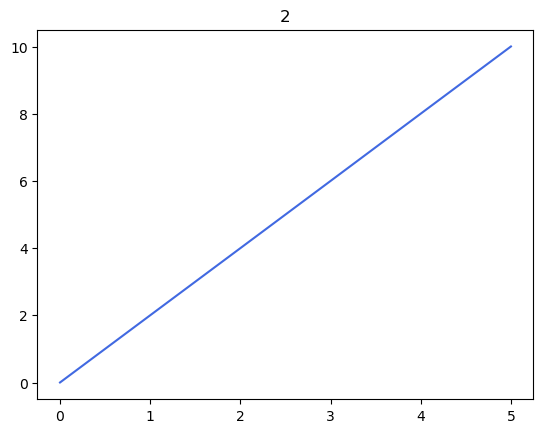

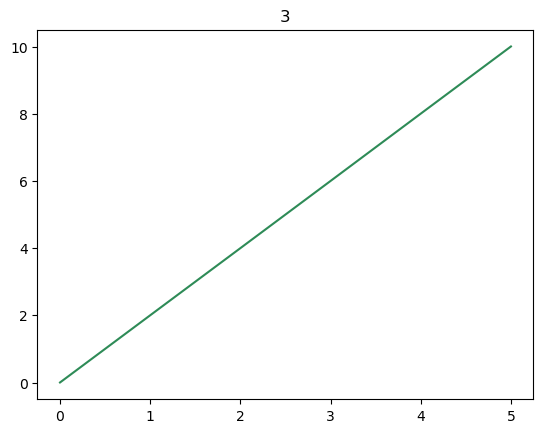

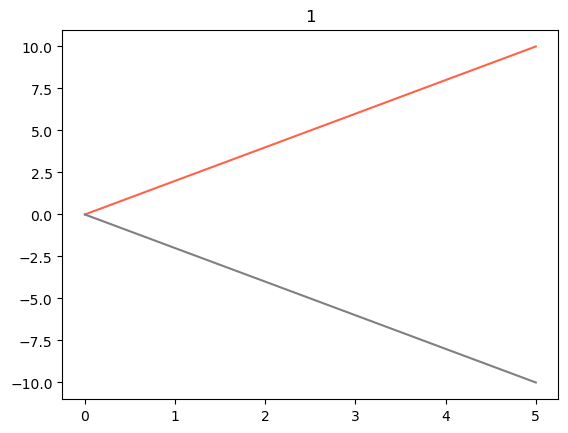

In [21]:
plt.figure()
plt.title(1)
plt.subplot(1, 1, 1)
plt.plot(x, y, color='tomato')

plt.figure()
plt.title(2)
plt.subplot(1, 1, 1)
plt.plot(x, y, color='royalblue')

plt.figure()
plt.title(3)
plt.subplot(1, 1, 1)
plt.plot(x, y, color='seagreen')

fig = plt.figure(num=1)
ax = fig.gca()
ax.plot(x, -y, color='gray')

The ```Figure``` class has the method ```subplots``` which behaves similar to the ```plt.subplots``` but is bound to the existing ```Figure``` instance. This creates an ```ndarray``` of ```Axes``` which can be indexed:

Figure(640x480): <class 'matplotlib.figure.Figure'>
[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]: <class 'numpy.ndarray'>


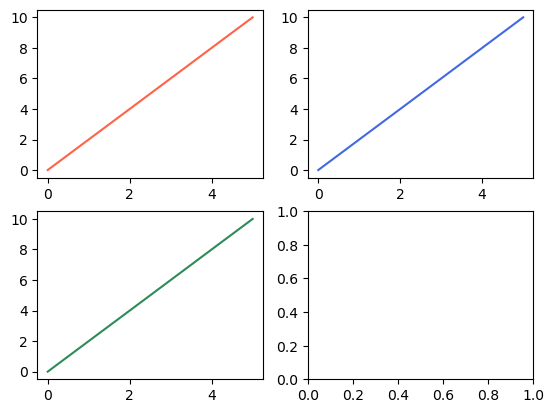

In [22]:
fig = plt.figure()
ax = fig.subplots(nrows=2, ncols=2)
print(f'{fig}: {type(fig)}')
print(f'{ax}: {type(ax)}')

ax[0, 0].plot(x, y, color='tomato');
ax[1, 0].plot(x, y, color='seagreen');
ax[0, 1].plot(x, y, color='royalblue');

The ```Figure``` class has the method ```subplot_mosaic``` which can be used to create a label for each ```Axes```. This creates an ```dict``` of ```Axes``` where the label is the ```key``` and can be used to index into the ```Axes```. Notice also if neighbouring subplots are given the same label, then the plot will be expanded over them:

Figure(640x480): <class 'matplotlib.figure.Figure'>
{'tomato': <Axes: label='tomato'>, 'royalblue': <Axes: label='royalblue'>, 'seagreen': <Axes: label='seagreen'>}: <class 'dict'>


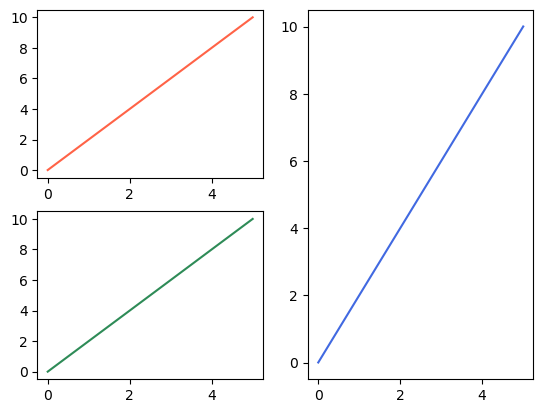

In [23]:
mosaic = [['tomato', 'royalblue'],
          ['seagreen', 'royalblue']]

fig = plt.figure()
ax = fig.subplot_mosaic(mosaic=mosaic)
print(f'{fig}: {type(fig)}')
print(f'{ax}: {type(ax)}')

ax['tomato'].plot(x, y, color='tomato');
ax['royalblue'].plot(x, y, color='royalblue');
ax['seagreen'].plot(x, y, color='seagreen');

It is not possible to do the above by slicing into the ```ndarray``` (2D) of ```Axes``` generated by ```plt.subplots``` or ```Figure.subplots``` as the slice creates another ```ndarray``` (1D) which is not a ```mpl``` class and therefore has no plot methods. 

The ```Figure.add_subplot``` method is similar to the ```plt.subplot``` function and is bound to the ```Figure``` instance. The ```Figure.add_subplot``` places each subplot individually on the ```Figure``` instead of instantiating them all simultaneously like ```Figure.subplots``` or ```Figure.subplot_mosaic``` and uses the ```index``` to select a subplot. The ```index``` is only configured for an ```int``` instance and does not recognise a ```list``` of ```int``` neighbouring values, therefore has the same limitations of ```Figure.subplots``` and isn't as flexible as ```Figure.subplot_mosaic```:

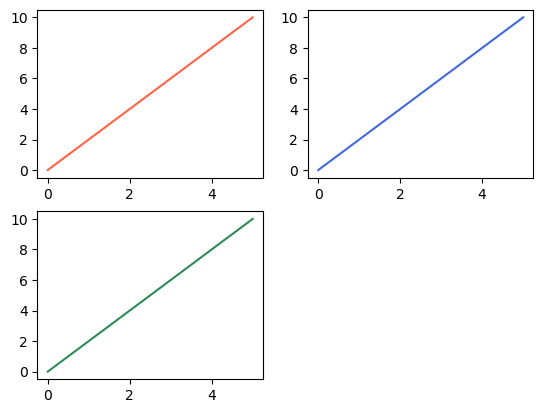

In [24]:
mosaic = [['tomato', 'royalblue'],
          ['seagreen', 'royalblue']]

fig = plt.figure()
tomato = fig.add_subplot(2, 2, 1)
royalblue = fig.add_subplot(2, 2, 2)
seagreen = fig.add_subplot(2, 2, 3)

tomato.plot(x, y, color='tomato');
royalblue.plot(x, y, color='royalblue');
seagreen.plot(x, y, color='seagreen');

Another way of adding ```Axes``` is by using the ```Figure.add_axes``` which takes in a rectangle of normalised co-ordinates of the form:

```python
rectangle = (left, bottom, width, height)
```

The parameters provided in the ```tuple``` are not named and the code can be more readable using a ```namedtuple```:

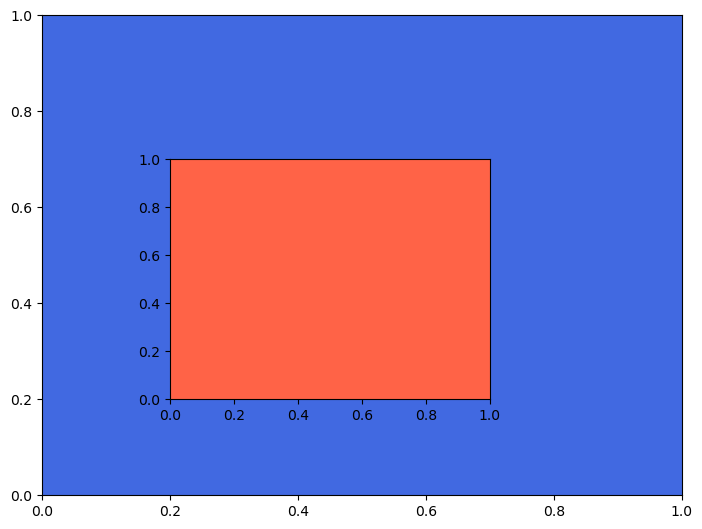

In [25]:
from collections import namedtuple
AxesRect = namedtuple('AxesRect', ['left', 'bottom', 'width', 'height'])

fig = plt.figure()
ax1 = fig.add_axes(rect=AxesRect(left=0, bottom=0, width=1, height=1), facecolor='royalblue')
ax2 = fig.add_axes(rect=AxesRect(left=0.2, bottom=0.2, width=0.5, height=0.5), facecolor='tomato')

it is possible to create two ```Axes``` instances that have a linked x-axis or linked y-axis:

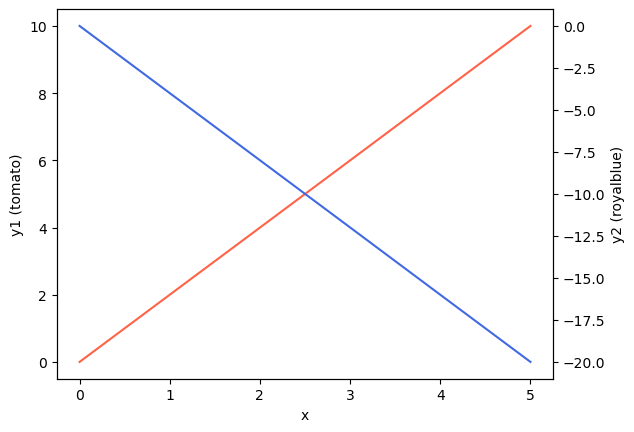

In [26]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(x, y, color='tomato')
ax1.set_xlabel('x')
ax1.set_ylabel('y1 (tomato)')
ax2 = ax1.twinx()
ax2.set_ylabel('y2 (royalblue)')
ax2.plot(x, -2*y, color='royalblue')

Text(0.5, 0, 'x2 (gold)')

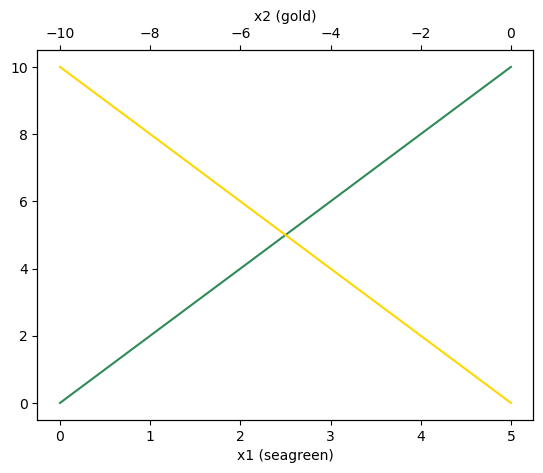

In [27]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(x, y, color='seagreen')
ax1.set_xlabel('x1 (seagreen)')
ax2 = ax1.twiny()
ax2.plot(-2*x, y, color='gold')
ax2.set_xlabel('x2 (gold)')

The ```fig.add_subplots``` method has a parameter ```projection```:

Axes(0.125,0.11;0.775x0.77) <class 'matplotlib.axes._axes.Axes'>


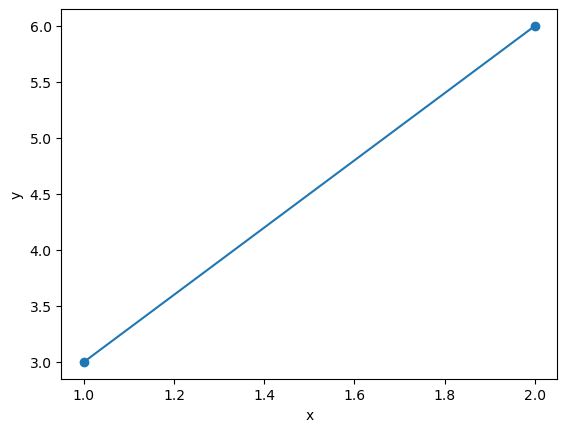

In [32]:
x = np.array([1, 2])
y = np.array([3, 6])

fig = plt.figure()
ax2d = fig.add_subplot(1, 1, 1)
ax2d.plot(x, y, marker='o')
ax2d.set_xlabel('x')
ax2d.set_ylabel('y')

print(ax2d, type(ax2d))

Axes3D(0.125,0.11;0.775x0.77) <class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>


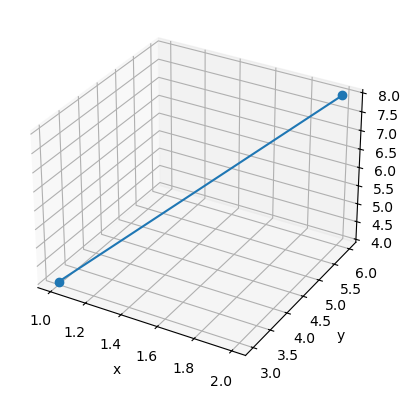

In [33]:
x = np.array([1, 2])
y = np.array([3, 6])
z = np.array([4, 8])

fig = plt.figure()
ax3d = fig.add_subplot(1, 1, 1, projection='3d')
ax3d.plot3D(x, y, z, marker='o')
ax3d.set_xlabel('x')
ax3d.set_ylabel('y')
ax3d.set_zlabel('z')

print(ax3d, type(ax3d))

The ```Axes3D``` class is based on the ```Axes``` class and has most of the same identifiers:

In [30]:
print_identifier_group(ax3d, kind='all', second=ax2d, show_only_intersection_identifiers=True)

datamodel attribute: ['__dict__', '__doc__', '__module__']
datamodel method: ['__class__', '__delattr__', '__dir__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__']
constant: []
attribute: ['artists', 'axes', 'axison', 'bbox', 'callbacks', 'child_axes', 'clipbox', 'collections', 'containers', 'dataLim', 'figure', 'fmt_xdata', 'fmt_ydata', 'get_frame_on', 'ignore_existing_data_limits', 'images', 'legend_', 'lines', 'mouseover', 'name', 'patch', 'patches', 'set_frame_on', 'spines', 'stale', 'sticky_edges', 'tables', 'texts', 'title', 'titleOffsetTrans', 'transAxes', 'transData', 'transLimits', 'transScale', 'use_sticky_edges', 'viewLim', 'xaxis', 'yaxis', 'zorder']
method/function: ['acorr', 'add_artist', 'add_callback', 'add_child_axes', '

It however includes the following 3D additions:

In [31]:
print_identifier_group(ax3d, kind='all', second=ax2d, show_unique_identifiers=True)

datamodel attribute: []
datamodel method: []
constant: ['M']
attribute: ['azim', 'button_pressed', 'computed_zorder', 'elev', 'eye', 'fmt_zdata', 'initial_azim', 'initial_elev', 'initial_roll', 'invM', 'roll', 'sx', 'sy', 'vvec', 'xy_dataLim', 'xy_viewLim', 'zaxis', 'zz_dataLim', 'zz_viewLim']
method/function: ['add_collection3d', 'add_contour_set', 'add_contourf_set', 'auto_scale_xyz', 'bar3d', 'contour3D', 'contourf3D', 'convert_zunits', 'disable_mouse_rotation', 'format_zdata', 'get_autoscalez_on', 'get_axis_position', 'get_proj', 'get_w_lims', 'get_xlim3d', 'get_ylim3d', 'get_zaxis', 'get_zbound', 'get_zgridlines', 'get_zlabel', 'get_zlim', 'get_zlim3d', 'get_zmajorticklabels', 'get_zminorticklabels', 'get_zscale', 'get_zticklabels', 'get_zticklines', 'get_zticks', 'invert_zaxis', 'mouse_init', 'plot3D', 'plot_surface', 'plot_trisurf', 'plot_wireframe', 'quiver3D', 'scatter3D', 'set_autoscalez_on', 'set_proj_type', 'set_top_view', 'set_xlim3d', 'set_ylim3d', 'set_zbound', 'set_zlab

Another ```projection``` is ```'polar'```. 

$x$ and $y$ data can be expressed as a radius $r$ and angle $\theta$ where:

$$r=\sqrt{x^{2}+y^{2}}$$

And:

$$\theta=\arctan{\left(\frac{y}{x}\right)}

Note that $\theta$ is measured in radians but usually displayed in a polar plot using degrees.

The following dataset can be examined:

In [34]:
r = np.arange(0, 1, 0.1)
theta = 2 * np.pi * r
degree = np.rad2deg(theta)

y = r * np.sin(theta)
x = r * np.cos(theta)

pd.DataFrame({'x': x, 'y': y, 'r': r, 'theta': theta, 'degree': degree, })

,x,y,r,theta,degree
0,0.000000,0.000000e+00,0.0,0.000000,0.0
1,0.080902,5.877853e-02,0.1,0.628319,36.0
2,0.061803,1.902113e-01,0.2,1.256637,72.0
3,-0.092705,2.853170e-01,0.3,1.884956,108.0
4,-0.323607,2.351141e-01,0.4,2.513274,144.0
5,-0.500000,6.123234e-17,0.5,3.141593,180.0
6,-0.485410,-3.526712e-01,0.6,3.769911,216.0
7,-0.216312,-6.657396e-01,0.7,4.398230,252.0
8,0.247214,-7.608452e-01,0.8,5.026548,288.0
9,0.728115,-5.290067e-01,0.9,5.654867,324.0


This can be plotted using a normal $x$, $y$ ```Axes``` and a $r$, $\theta$ ```PolarAxes```:

PolarAxes(0.125,0.11;0.775x0.77) <class 'matplotlib.projections.polar.PolarAxes'>


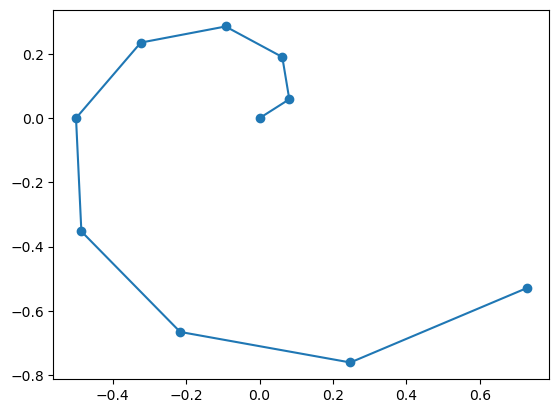

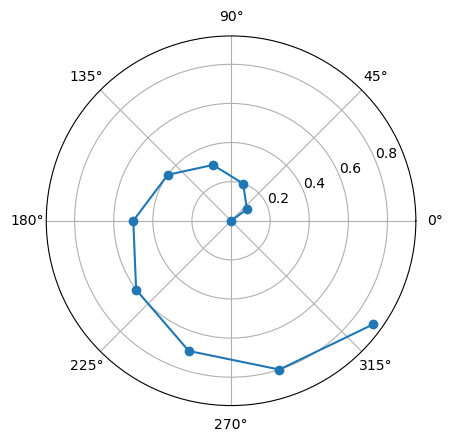

In [36]:
fig, ax = plt.subplots()
ax.plot(x, y, marker='o')

fig = plt.figure()
axpolar = fig.add_subplot(1, 1, 1, projection='polar')
axpolar.plot(theta, r, marker='o')
print(axpolar, type(axpolar))

Notice that ```AxesPolar``` has the same identifiers as ```Axes```

In [37]:
print_identifier_group(axpolar, kind='all', second=ax, show_only_intersection_identifiers=True)

datamodel attribute: ['__dict__', '__doc__', '__module__', '__weakref__']
datamodel method: ['__class__', '__delattr__', '__dir__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__']
constant: []
attribute: ['artists', 'axes', 'axison', 'bbox', 'callbacks', 'child_axes', 'clipbox', 'collections', 'containers', 'dataLim', 'figure', 'fmt_xdata', 'fmt_ydata', 'ignore_existing_data_limits', 'images', 'legend_', 'lines', 'mouseover', 'name', 'patch', 'patches', 'spines', 'stale', 'sticky_edges', 'tables', 'texts', 'title', 'titleOffsetTrans', 'transAxes', 'transData', 'transScale', 'use_sticky_edges', 'viewLim', 'xaxis', 'yaxis', 'zorder']
method/function: ['acorr', 'add_artist', 'add_callback', 'add_child_axes', 'add_collection', 'add_container', 'add_image', 

In [38]:
print_identifier_group(axpolar, kind='all', second=ax, show_unique_identifiers=True)

datamodel attribute: []
datamodel method: []
constant: []
attribute: ['axesLim', 'transProjection', 'transProjectionAffine', 'transShift', 'transWedge']
method/function: ['get_rlabel_position', 'get_rmax', 'get_rmin', 'get_rorigin', 'get_rsign', 'get_theta_direction', 'get_theta_offset', 'get_thetamax', 'get_thetamin', 'set_rgrids', 'set_rlabel_position', 'set_rlim', 'set_rmax', 'set_rmin', 'set_rorigin', 'set_rscale', 'set_rticks', 'set_theta_direction', 'set_theta_offset', 'set_theta_zero_location', 'set_thetagrids', 'set_thetalim', 'set_thetamax', 'set_thetamin']
upper class: ['InvertedPolarTransform', 'PolarAffine', 'PolarTransform', 'RadialLocator', 'ThetaFormatter', 'ThetaLocator']
lower class: []


In [ ]:
fig = plt.figure()
axpolar = fig.add_subplot(1, 1, 1, projection='polar')

In [ ]:
print_identifier_group(axpolar, kind='all', second=ax2d, show_only_intersection_identifiers=True)

In [ ]:
print_identifier_group(axpolar, kind='all', second=ax2d, show_unique_identifiers=True)

The function ```plt.getp``` (get properties) can be used to get the properties of an instance that belongs to a ```plt``` class. If the following components of the ```Figure``` are examined:

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x_text = ax.set_xlabel('x')
y_text = ax.set_ylabel('y')
title_text = ax.set_title('y=f(x)')
line_list = ax.plot(x, y)

The properties of the ```Figure``` instance can be examined:

In [ ]:
plt.getp(fig)

The most commonly changed keyword input arguments match those shown in the docstring of the ```plt.Figure``` classes initialisation signature:

In [ ]:
plt.Figure?

The properties of the ```Axes``` instance can be examined:

In [ ]:
plt.getp(ax)

The most commonly changed keyword input arguments match those shown in the docstring of the ```plt.Axes``` classes initialisation signature:

In [ ]:
plt.Axes?

The properties of the ```Text``` instance can be examined:

In [ ]:
plt.getp(x_text)

The most commonly changed keyword input arguments match those shown in the docstring of the ```plt.Text``` classes initialisation signature:

In [ ]:
plt.Text?

The properties of the ```list``` instance of ```Line2D``` classes can be examined:

In [ ]:
plt.getp(line_list)

Or of a single ```Line2D``` class can be examined:

In [ ]:
plt.getp(line_list[0])

The most commonly changed keyword input arguments match those shown in the docstring of the ```ax.plot``` classes initialisation signature:

In [ ]:
ax.plot?

The associated function ```plt.setp``` (set properties) can be used to set properties, for example:

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x_text = ax.set_xlabel('x')
y_text = ax.set_ylabel('y')
title_text = ax.set_title('y=f(x)')
line_list = ax.plot(x, y)
plt.setp(line_list[0], color='tomato', linewidth=3, linestyle=':')

Instead of using ```plt.setp``` these can be supplied as input arguments for the plotting function. Normally only the ```mpl``` instances likely to be later accessed are assigned to instance names and the code above is written typically like:

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('y=f(x)')
line_list = ax.plot(x, y, color='tomato', linewidth=3, linestyle=':')

## Text

The most commonly added ```Text``` to a plot are ```Axes``` labels:

### Axes Labels

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y, color='tomato')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('y=f(x)');

The docstring of the ```Axes.set_xlabel``` method may be examined to see additional properties:

In [ ]:
ax.set_xlabel?

These are Text related so also have the following keyword input arguments:

In [ ]:
plt.Text?

For example the following changes can be made to the xlabel;

In [ ]:
fig, ax = plt.subplots(num=1);
ax.plot(x, y, color='tomato');
ax.set_xlabel('xlabel', loc='left', color='tomato', rotation=270);

### Labels and TeX

The labels also TeX input, for example:

Inline Equation:

```$\sin{\alpha}\pm\sin{\beta}=2\sin{\frac{1}{2}\left(\alpha\pm\beta\right)}\cos{\frac{1}{2}\left(\alpha\mp\beta\right)}$```

$\sin{\alpha}\pm\sin{\beta}=2\sin{\frac{1}{2}\left(\alpha\pm\beta\right)}\cos{\frac{1}{2}\left(\alpha\mp\beta\right)}$

Display Equation:

```$$\sin{\alpha}\pm\sin{\beta}=2\sin{\frac{1}{2}\left(\alpha\pm\beta\right)}\cos{\frac{1}{2}\left(\alpha\mp\beta\right)}$$```

$$\sin{\alpha}\pm\sin{\beta}=2\sin{\frac{1}{2}\left(\alpha\pm\beta\right)}\cos{\frac{1}{2}\left(\alpha\mp\beta\right)}$$

Note that inline equations are raw strings enclosed in single ```$``` signs of the form:

```python
r'$EQUATION$'
```

And display equations are raw strings enclosed in double ```$$``` signs of the form:

```python
r'$$EQUATION$$'
```

The ```Axes``` methods return ```Text``` objects have the ```usetex``` keyword input argument which is ```False``` by default which renders the text using the quick default that only supports inline equations. This can be set to ```True``` which will instead render the text using TeX and supports both inline and display equations. Rendering is slightly slower using TeX.

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y, color='tomato')
ax.set_xlabel(r'$\sin{\alpha}\pm\sin{\beta}=2\sin{\frac{1}{2}\left(\alpha\pm\beta\right)}\cos{\frac{1}{2}\left(\alpha\mp\beta\right)}$', 
              usetex=False)
ax.set_ylabel(r'$\sin{\alpha}\pm\sin{\beta}=2\sin{\frac{1}{2}\left(\alpha\pm\beta\right)}\cos{\frac{1}{2}\left(\alpha\mp\beta\right)}$', 
              usetex=False)
ax.set_title(r'$\sin{\alpha}\pm\sin{\beta}=2\sin{\frac{1}{2}\left(\alpha\pm\beta\right)}\cos{\frac{1}{2}\left(\alpha\mp\beta\right)}$',
             usetex=False)
ax.text(x=2, y=4, s=r'$\sin{\alpha}\pm\sin{\beta}=2\sin{\frac{1}{2}\left(\alpha\pm\beta\right)}\cos{\frac{1}{2}\left(\alpha\mp\beta\right)}$',
        usetex=False)

fig, ax = plt.subplots()
ax.plot(x, y, color='tomato')
ax.set_xlabel(r'$\sin{\alpha}\pm\sin{\beta}=2\sin{\frac{1}{2}\left(\alpha\pm\beta\right)}\cos{\frac{1}{2}\left(\alpha\mp\beta\right)}$', 
              usetex=True)
ax.set_ylabel(r'$\sin{\alpha}\pm\sin{\beta}=2\sin{\frac{1}{2}\left(\alpha\pm\beta\right)}\cos{\frac{1}{2}\left(\alpha\mp\beta\right)}$', 
              usetex=True)
ax.set_title(r'$$\sin{\alpha}\pm\sin{\beta}=2\sin{\frac{1}{2}\left(\alpha\pm\beta\right)}\cos{\frac{1}{2}\left(\alpha\mp\beta\right)}$$',
             usetex=True)
ax.text(x=2, y=4, s=r'$$\sin{\alpha}\pm\sin{\beta}=2\sin{\frac{1}{2}\left(\alpha\pm\beta\right)}\cos{\frac{1}{2}\left(\alpha\mp\beta\right)}$$',
        usetex=True)

Note that the ```Axes.Text``` instance is inserted at the data co-ordinate ```x=2, y=4``` as expected (the ```Axes.Text``` method does not have the parameter ```xycoords='data'``` but the behaviour is consistent with other methods such as ```Axes.annotate```).

TeX equations can be constructed in a WYSIWYG equation editor such as the equation Editor in Microsoft Word or OnlyOffice Desktop Editors. The setting can be changed to LaTeX and it can be displayed in a linear view. This will give the equation in the format required but it will need to be placed in a raw string with dollar signs or double dollar signs. There is a subtle difference between TeX and LaTeX (as previously discussed in the Markdown tutorial). LaTeX is essentially an extension of TeX which is the underlying typeset and LateX can be extended with packages. Sometimes the output in LaTeX will need to be simplified to TeX.

The following characters are reserved symbols as they are used as formatting characters in TeX:

|Symbol Name|Symbol|Meaning|
|---|---|---|
|dollar sign|```$```|enclosure for math mode; single enclosure=inline equation, double enclosure=display equation|
|single quotes|```'```|used for str|
|double quotes|```"```|used for str|
|backslash|```\```|inserts an escape character or command|
|braces|```{}```|enclose command arguments|
|ampersand|```&```|group command arguments|
|hash|```#```|used for a reference|
|percentage sign|```%```|comment|
|pipe|```\|```|column divider|
|hyphen|```-```|minus symbol|
|caret|```^```|superscript|
|underscore|```_```|subscript|
|tilde|```~```|non-breaking space|

The following commands can be used to change the text type:

|description|TeX|output|
|---|---|---|
|math text|```$Hello World! 1-2$```|$Hello World! 1-2$|
|math roman|```$\mathrm{Hello World! 1-2}$```|$\mathrm{Hello World! 1-2}$|
|bold text|```$\textbf{Hello World! 1-2}$```|$\textbf{Hello World! 1-2}$|
|normal text|```$\text{Hello World! 1-2}$```|$\text{Hello World! 1-2}$|
|verbatim text|```$\verb\|{"Hello World!" 1-2 ~^\}\|$```|$\verb\|{"Hello World!" 1-2 ~^\}\|$|

Notice a command is of the form:

```tex
\command{arg}
```

Verbatim text has additional support for some of the formatting characters such as ```~^\{}```. 

Recall in Python that a quotation is recognised as an instruction to close the ```str``` and Python can uses the escape characters to indicate that ```\'``` and ```\"``` are instead part of the ```str```. This instruction is unfortunately not recognised by LaTeX which will instead display the ```\``` in verbatim text. Single quotations can be used to enclose a ```str``` that is intended to have double quotations and vice-versa. If the ```LaTeX``` text contains both, then concatenation can be used:

```python
r'$\verb|"|$' + r"$\verb|'|$"
```

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y, color='tomato')
ax.set_xlabel(r'$\verb|"Hello World!"|$'+r"$\verb|'Hello World!'|$", 
              usetex=True)
ax.set_ylabel(r'$\verb|"Hello World!"|$'+r"$\verb|'Hello World!'|$", 
              usetex=True)
ax.set_title(r'$\verb|"Hello World!"|$'+r"$\verb|'Hello World!'|$", 
              usetex=True)
ax.text(x=2, y=4, s=r'$\verb|"Hello World!"|$'+r"$\verb|'Hello World!'|$",
        usetex=True)

Sometimes the formatting characters need to be incorporated into the equation. This can be done using the escape characters:

|description|TeX|output|
|---|---|---|
|dollar sign|```$\$$```|$\$$|
|percentage sign|```$\%$```|$\%$|
|hash|```$\#$```|$\#$|
|ampersand|```$\&$```|$\&$|

Some of the other formatting characters can be inserted using the following syntax:

|description|TeX|output|
|---|---|---|
|backslash|```$\backslash$```|$\backslash$|
|pipe|```$\vert$```|$\vert$|
|left brace|```$\lbrace$```|$\lbrace$|
|right brace|```$\rbrace$```|$\rbrace$|

This syntax is also available for commonly used mathematical symbols:

|description|TeX|output|
|---|---|---|
|equal to|```$=$```|$=$|
|equivalent to|```$\equiv$```|$\equiv$|
|not equal to|```$\ne$```|$\ne$|
|similar to|```$\sim$```|$\sim$|
|approximate to|```$\approx$```|$\approx$|
|tilde|```$\sim$```|$\sim$|
|approximately equal to|```$\cong$```|$\cong$|
|plus|```$+$```|$+$|
|minus|```$-$```|$-$|
|plus minus|```$\pm$```|$\pm$|
|minus plus|```$\mp$```|$\mp$|
|asterisk|```$\ast$```|$\ast$|
|times|```$\times$```|$\times$|
|centre dot|```$\cdot$```|$\cdot$|
|period|```$.$```|$.$|
|bullet|```$\bullet$```|$\bullet$|
|colon|```$\colon$```|$\colon$|
|centre dots|```$\cdots$```|$\cdots$|
|vertical dots|```$\vdots$```|$\vdots$|
|therefore|```$\therefore$```|$\therefore$|
|division slash|```$/$```|$/$|
|division sign|```$\div$```|$\div$|
|less than|```$<$```|$<$|
|less than or equal to|```$\leq$```|$\leq$|
|greater than|```$>$```|$>$|
|greater than or equal to|```$\geq$```|$\geq$|
|factorial|```$!$```|$!$|
|degree|```$\degree$```|$\degree$|
|infinity|```$\infty$```|$\infty$|
|proportional to|```$\propto$```|$\propto$|
|partial|```$\partial$```|$\partial$|
|hbar|```$\hbar$```|$\hbar$|
|union|```$\cup$```|$\cup$|
|intersection|```$\cap$```|$\cap$|
|emptyset|```$\emptyset$```|$\emptyset$|
|exists|```$\exists$```|$\exists$|
|in|```$\in$```|$\in$|
|not in|```$\notin$```|$\notin$|
|ni|```$\ni$```|$\ni$|
|left arrow|```$\leftarrow$```|$\leftarrow$|
|right arrow|```$\rightarrow$```|$\rightarrow$|
|left right arrow|```$\leftrightarrow$```|$\leftrightarrow$|
|up arrow|```$\uparrow$```|$\uparrow$|
|down arrow|```$\uparrow$```|$\downarrow$|
|up down arrow|```$\updownarrow$```|$\updownarrow$|

Greek Letters:

|description|TeX|output|
|---|---|---|
|alpha|```$\alpha$```|$\alpha$|
|beta|```$\beta$```|$\beta$|
|Gamma|```$\Gamma$```|$\Gamma$|
|gamma|```$\gamma$```|$\gamma$|
|Delta|```$\Delta$```|$\Delta$|
|delta|```$\delta$```|$\delta$|
|nabla|```$\nabla$```|$\nabla$|
|epsilon|```$\epsilon$```|$\epsilon$|
|epsilon|```$\varepsilon$```|$\varepsilon$|
|zeta|```$\zeta$```|$\zeta$|
|eta|```$\eta$```|$\eta$|
|kappa|```$\kappa$```|$\kappa$|
|Lambda|```$\Lamba$```|$\Lambda$|
|mu|```$\mu$```|$\mu$|
|Xi|```$\Xi$```|$\Xi$|
|xi|```$\xi$```|$\xi$|
|Pi|```$\Pi$```|$\Pi$|
|pi|```$\pi$```|$\pi$|
|rho|```$\rho$```|$\rho$|
|Sigma|```$\Sigma$```|$\Sigma$|
|sigma|```$\sigma$```|$\sigma$|
|sigma|```$\varsigma$```|$\varsigma$|
|tau|```$\tau$```|$\tau$|
|Upsilon|```$\Upsilon$```|$\Upsilon$|
|upsilon|```$\upsilon$```|$\upsilon$|
|Phi|```$\Phi$```|$\Phi$|
|phi|```$\phi$```|$\phi$|
|chi|```$\chi$```|$\chi$|
|Psi|```$\Psi$```|$\Psi$|
|psi|```$\psi$```|$\psi$|
|Omega|```$\Omega$```|$\Omega$|
|omega|```$\omega$```|$\omega$|

Note the Greek letters A, B, E, Z, H, I, i, K, M, N, O, o and P that are the same as Latin letters are therefore just represented using the Latin letters.

Commands can be used to apply an accent:

|description|TeX|output|
|---|---|---|
|math text with dot|```$\dot{x}$```|$\dot{x}$|
|math text with double dot|```$\ddot{x}$```|$\ddot{x}$|
|math text with bar|```$\bar{x}$```|$\bar{x}$|
|math text with hat|```$\hat{x}$```|$\hat{x}$|
|math text with arrow vector|```$\vec{x}$```|$\vec{x}$|
|math text with tilde|```$\tilde{x}$```|$\tilde{x}$|
|math text with wide tilde|```$\widetilde{xx}$```|$\widetilde{xx}$|
|math text with check|```$\check{x}$```|$\check{x}$|
|math text with acute|```$\acute{x}$```|$\acute{x}$|
|math text with grave|```$\grave{x}$```|$\grave{x}$|
|math text with breve|```$\breve{x}$```|$\breve{x}$|
|subscript|```$x_{2}$```|$x_{2}$|
|superscript|```$x^{3}$```|$x^{3}$|
|subscript and superscript|```$x_{2}^{3}$```|$x_{2}^{3}$|
|square root|```$\sqrt{x}$```|$\sqrt{x}$|
|sin|```$\sin{x}$```|$\sin{x}$|
|cos|```$\cos{x}$```|$\cos{x}$|
|tan|```$\tan{x}$```|$\tan{x}$|
|log|```$\log{x}$```|$\log{x}$|
|exp|```$\exp{x}$```|$\exp{x}$|

Fractions can be added using:

|description|TeX|output|
|---|---|---|
|inline fraction|```$\frac{a}{b}$```|$\frac{a}{b}$|

Brackets are added using:

|description|TeX|output|
|---|---|---|
|inline fraction parenthesis|```$(\frac{a}{b})$```|$(\frac{a}{b})$|
|inline fraction square|```$[\frac{a}{b}]$```|$[\frac{a}{b}]$|
|inline fraction braces|```$\lbrace\frac{a}{b}\rbrace$```|$\lbrace\frac{a}{b} \rbrace$|

### Annotations

Annotations can be added using the method ```Axes.annotate``` or function ```plt.annotate```:

In [ ]:
ax.annotate?

The annotation takes in a number of keyword input arguments. 

In the simplest case, ```text``` is the text to be annotated and ```xy``` is a tuple of the co-ordinates using the units specified in ```xycoords```.

More generally a specific data point at ```xy``` is annotated using text at ```xytext``` and an arrow is drawn from ```xytext``` to ```xy```. 

The keyword argument ```arrowprops``` is a ```dict``` of arrow properties. The default Python syntax ```{}``` can be used for the ```dict``` instance however often instantiation of the ```dict``` class using named parameters is preferred. Instantiation of a ```dict``` using the ```dict``` class matches the format of input arguments used elsewhere in the function call:

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y, color='tomato')

ax.annotate(text='noarrow', xy=(0.5, 1), xycoords='data')

ax.annotate(text='fancyarrow', xy=(1, 2), xytext=(1, 4), xycoords='data', color='dodgerblue', 
            arrowprops={'color': 'magenta', 'arrowstyle': 'fancy'})
ax.annotate(text='fancyarrow', xy=(2, 4), xytext=(2, 6), xycoords='data', 
            arrowprops={'facecolor': 'magenta', 'edgecolor': 'cyan', 'arrowstyle': 'fancy'})
ax.annotate(text='simplearrow', xy=(3, 6), xytext=(3, 4), xycoords='data', 
            arrowprops={'facecolor': 'lime', 'edgecolor': 'yellow', 'arrowstyle': 'simple'})

ax.annotate(text='customarrow', xy=(4, 8), xytext=(4, 6), xycoords='data', 
            arrowprops=dict(facecolor='royalblue', edgecolor='skyblue', headlength=10, headwidth=10, linewidth=2))

## Axes Limits

The Axes limits are automatically determined from the data:

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes(rect=AxesRect(left=0, bottom=0, width=1, height=1))
ax1.plot(x, y**2, color='tomato')
ax2 = fig.add_axes(rect=AxesRect(left=0.1, bottom=0.55, width=0.4, height=0.4))
ax2.plot(x, y**2, color='tomato')

Sometimes it is desirable to change the ```Axes``` limits to zoom in or out of a region. This is done by the methods ```Axes.set_xlim``` and ```Axes.set_ylim``` or equivalent function ```plt.xlim``` or ```plt.ylim```:

In [ ]:
ax1.set_xlim?

Supposing the smaller ```Axes``` is supposed to highlight the start of the data, the following limits can be added:

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes(rect=AxesRect(left=0, bottom=0, width=1, height=1))
ax1.set_xlim(left=0, right=6, auto=False)
ax1.set_ylim(bottom=0, top=200, auto=False)
ax1.plot(x, y**2, color='tomato')
ax2 = fig.add_axes(rect=AxesRect(left=0.1, bottom=0.55, width=0.4, height=0.4))
ax2.set_xlim(left=-0.5, right=1, auto=False)
ax2.set_ylim(bottom=-5, top=10, auto=False)
ax2.plot(x, y**2, color='tomato')

The limits are normally set by using the keyword arguments ```left``` and ```right``` for x or ```bottom``` and ```top``` for y. 

```python
ax1.set_xlim(left=0, right=6, auto=False)
ax1.set_ylim(bottom=0, top=200, auto=False)
```

```left``` and ```right``` have the alias ```xmin``` and ```xmax```. Likewise ```bottom``` and ```top``` have the alias ```ymin``` and ```ymax```:

```python
ax1.set_xlim(xmin=0, xmax=6, auto=False)
ax1.set_ylim(ymin=0, ymax=200, auto=False)
```

If both limits are provided, they can also be supplied using a ```tuple```:

```python
ax1.set_xlim((0, 6), auto=False)
ax1.set_ylim((0, 200), auto=False)
```


## Axes Scale

When a value has a non-linear dependence it is sometimes insightful to view it on a logarithmic scale. This can be done using the methods ```Axes.set_xscale``` and ```Axes.set_yscale``` or the equivalent functions ```plt.xscale``` and ```plt.yscale```:

In [ ]:
ax2.set_yscale?

The log of 0 is -∞:

```python
np.log(0)
```

And the log of a negative number is not a number:

```python
np.log(-1)
```

Therefore the ```bottom``` limit is normally set to 1 when using a log scale:

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes(rect=AxesRect(left=0, bottom=0, width=1, height=1))
ax1.plot(x, y**10, color='tomato')
ax2 = fig.add_axes(rect=AxesRect(left=0.1, bottom=0.55, width=0.4, height=0.4))
ax2.plot(x, y**10, color='tomato')
ax2.set_yscale('log')
ax2.set_ylim(bottom=1)

## Line Plot

Previously a single line plot was created using the ```Axes.plot``` method:

In [ ]:
fig, ax = plt.subplots()
lines = ax.plot(x, y)
print(lines, type(lines))
print(lines[0], type(lines[0]))

The ```Axes.plot``` method has ```*args``` which mean a variable number of input arguments can be input. Multiple traces can be plotted using:

In [ ]:
fig, ax = plt.subplots()
lines = ax.plot(x, y, 
                x, y+1,
                x, y+2,
                x, y+3, 
                x, y+4,
                x, y+5,
                x, y+6,
                x, y+7,
                x, y+8,
                x, y+9,
                x, y+10,
                x, y+11)
print(lines, type(lines))

## Colours

Notice that each line has its own colour until the 10th line is reached and the colours then repeat. This is because the default colours used are called ```TABLEAU_COLORS```* and there are 10 colours:

In [ ]:
mpl.colors.TABLEAU_COLORS

The colours in ```TABLEAU_COLORS``` are discrete colours carefully selected to make it easy to distinguish each line.

\* Unfortunately Python uses US English opposed to UK English, British spellings of colo**u**r won't be recognised.

Notice that ```TABLEAU_colors``` is a ```dict``` instance. The keys are ```str``` instance of the form ```'palette:colour'``` and the values are hexadecimal strings have the form ```#rrggbb```. 

```00:ff``` (base 16) ranges from ```0:256``` (base 10). ```mpl``` also accepts colours as normalised ```(r, g, b)``` values.

More details can be seen by looking at a colour picker for example in Microsoft Word.

<img src='images/img_001.png' alt='img_001' width='450'/>

The color above is a hexadecimal ```str``` with value ```#55aa7f```. This is also the normalised decimal ```tuple``` ```(85/255, 170/255, 127/255)```.

The wavelength response of the human eye can be examined. It has three types of receptors that are responsive to short, medium and long wavelengths respectively:

```human_eye.csv``` is placed in the ```data``` subfolder relative to this notebook file and contains data from the following publication:

[The spectral sensitivities of the middle- and long-wavelength-sensitive cones derived from measurements in observers of known genotype](https://www.sciencedirect.com/science/article/pii/S0042698900000213). 

It can be read into a ```pd.DataFrame``` instance:

In [ ]:
human_response = pd.read_csv(r'data\human_eye.csv', header=None, names=['wavelength', 'long', 'medium', 'short'])
human_response.head()

In [ ]:
fig, ax = plt.subplots()
ax.plot(human_response['wavelength'], human_response['short'], color='royalblue', label='short')
ax.plot(human_response['wavelength'], human_response['medium'], color='seagreen', label='medium')
ax.plot(human_response['wavelength'], human_response['long'], color='tomato', label='long')
ax.set_xlabel('wavelength')
ax.set_ylabel('normalised energy')
ax.set_title('Human Eye Response')
ax.legend()

Essentially the eye records intensities using these three types of sensors and the brain maps this intensity ratio to a colour performing colour mixing.

Each pixel in a computer LED screen is a RGB LED which is a combination of the individual Red, Green and Blue LEDs. The intensity for each LED can be independently tuned over the 8 bits (1 byte) intensity level that the human eye is sensitive to ```000:255``` (decimal) or ```00:ff``` (hexadecimal). The brain colour ratios and the brain registers as a colour.

<img src='images/img_002.png' alt='img_002' width='450'/>

```mpl``` has another colour ```dict``` called ```CSS4_COLORS```, the key for each color is a ```str``` that corresponds to the English name of the colour and the value is the corresponding hexadecimal value of the form ```#rrggbb```:

In [ ]:
mpl

In [ ]:
mpl.colors.CSS4_COLORS

The ```key``` can be used to access the hexadecimal colour ```value```:

In [ ]:
mpl.colors.CSS4_COLORS['royalblue']

However every colour parameter from a ```mpl``` plotting is configured to recognise a key from ```CSS4_COLORS``` and therefore it is uncommon to make an explicit reference to the ```dict```. 

Notice that if ```color``` is provided as a keyword input argument, in a multiline plot that all lines will have the same ```color```:

In [ ]:
fig, ax = plt.subplots()
lines = ax.plot(x, y, 
                x, y+1,
                x, y+2,
                x, y+3, 
                x, y+4,
                x, y+5,
                x, y+6,
                x, y+7,
                x, y+8,
                x, y+9,
                x, y+10,
                x, y+11,
                color='royalblue')

Instead these can be provided positionally for each line:

In [ ]:
fig, ax = plt.subplots()
lines = ax.plot(x, y, 'royalblue', 
                x, y+1, 'tomato',
                x, y+2, 'chocolate',
                x, y+3, 'forestgreen',
                x, y+4, 'springgreen',
                x, y+5, 'turquoise',
                x, y+6, 'teal',
                x, y+7, 'skyblue',
                x, y+8, 'dodgerblue',
                x, y+9, 'slateblue',
                x, y+10, 'fuchsia',
                x, y+11, 'hotpink')
for line in lines:
    print(line, plt.getp(line, 'color'))

The eye has the long, medium and short wavelength receptors which correspond to the primary colours ```'red'```, ```'green'``` and ```'blue'```:

In [ ]:
mpl.colors.CSS4_COLORS['red']

In [ ]:
mpl.colors.CSS4_COLORS['green']

In [ ]:
mpl.colors.CSS4_COLORS['blue']

Notice that the intensity of ```'green'``` is not ```'#008000'``` and not ```'#00ff00'``` as a compensation has been made due to the eye being about twice as much green sensitive.

Secondary colours are even mixes of the primary colours:

In [ ]:
mpl.colors.CSS4_COLORS['cyan']

In [ ]:
mpl.colors.CSS4_COLORS['magenta']

In [ ]:
mpl.colors.CSS4_COLORS['yellow']

black is the absence of any light:

In [ ]:
mpl.colors.CSS4_COLORS['black']

white is when all three LEDs are equally illuminated:

In [ ]:
mpl.colors.CSS4_COLORS['white']

Another colour ```dict``` is ```BASE_COLORS``` which gives one letter abbreviations for these colours:

In [ ]:
mpl.colors.BASE_COLORS

Like ```CSS4_COLORS``` every colour parameter from a ```mpl``` plotting is configured to recognise the one letter key from ```BASE_COLORS``` and therefore it is uncommon to make an explicit reference to the ```dict```. 

Comparing the keys in ```BASE_COLORS``` with ```CSS4_COLORS```, the one letter key is equivalent to the full colour name:

```python
mapping  = {'r': 'red',
            'b': 'blue',
            'g': 'green',
            'c': 'cyan',
            'm': 'magenta',
            'y': 'yellow'
            'k': 'black'
            'w': 'white'}
```

However there is a subtle difference in the overall intensity level for the secondary colours.

**Generally when specifying a colour, the use of ```CSS4_COLORS``` key names is preferred where possible as it makes the code more readable.** 

## LineWidth

The ```linewidth``` can be changed using the keyword argument ```linewidth``` or alias ```lw```:

In [ ]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(x, y, linewidth=5)
ax[1].plot(x, y, lw=2.5)

When ```linewidth``` is provided as a keyword input argument, in a multiline plot that all lines will have the same linewidth:

In [ ]:
fig, ax = plt.subplots()
lines = ax.plot(x, y, 
                x, y+1,
                x, y+2,
                x, y+3, 
                x, y+4,
                x, y+5,
                x, y+6,
                x, y+7,
                x, y+8,
                x, y+9,
                x, y+10,
                x, y+11,
                color='royalblue', linewidth=0.5)
for line in lines:
    print(line, plt.getp(line, 'color'), plt.getp(line, 'linewidth'))

When a high level of customisation is desired, each line is normally separately plotted. The ```Axes.lines``` attribute is a list of every ```Line2D``` instances added to the plot in their insertion order:

In [ ]:
fig, ax = plt.subplots(num=1)
ax.plot(x, y, color='royalblue', linewidth=0.5)
ax.plot(x, y+1, color='tomato', linewidth=0.6)
ax.plot(x, y+2, color='chocolate', linewidth=0.7)
ax.plot(x, y+3, color='forestgreen', linewidth=0.8)
ax.plot(x, y+4, color='springgreen', linewidth=0.9)
ax.plot(x, y+5, color='turquoise', linewidth=1.0)
ax.plot(x, y+6, color='teal', linewidth=1.1)
ax.plot(x, y+7, color='skyblue', linewidth=1.2)
ax.plot(x, y+8, color='dodgerblue', linewidth=1.3)
ax.plot(x, y+9, color='slateblue', linewidth=1.4)
ax.plot(x, y+10, color='fuchsia', linewidth=1.5)
ax.plot(x, y+11, color='hotpink', linewidth=1.6)

for line in ax.lines:
    print(line, plt.getp(line, 'color'), plt.getp(line, 'linewidth'))

## LineStyle

The linestyle can be changed using the keyword input argument linestyle:

In [ ]:
fig, ax = plt.subplots(3, 1)
ax[0].plot(x, y, color='royalblue', linestyle='dashed', linewidth=1.0)
ax[0].plot(x, y+1, color='tomato', linestyle='dotted', linewidth=1.0)
ax[0].plot(x, y+2, color='seagreen', linestyle='dashdot', linewidth=1.0)
ax[1].plot(x, y, color='royalblue', ls='--', lw=1.0)
ax[1].plot(x, y+1, color='tomato', ls=':', lw=1.0)
ax[1].plot(x, y+2, color='seagreen', ls='-.', lw=1.0)
ax[2].plot(x, y, color='royalblue', ls=(0, (5, 5)), lw=1.0)
ax[2].plot(x, y+1, color='tomato', ls=(0, (1, 1)), lw=1.0)
ax[2].plot(x, y+2, color='springgreen', ls=(0, (1, 10)), lw=1.0)
ax[2].plot(x, y+3, color='gold', ls=(0, (1, 1)), lw=1.0)
ax[2].plot(x, y+4, color='teal', ls=(5, (10, 3)), lw=1.0)
ax[2].plot(x, y+5, color='purple', ls=(0, (5, 10)), lw=1.0)
ax[2].plot(x, y+6, color='dodgerblue', ls=(0, (5, 1)), lw=1.0)
ax[2].plot(x, y+7, color='slateblue', ls=(0, (3, 10, 1, 10)), lw=1.0)
ax[2].plot(x, y+8, color='hotpink', ls=(0, (3, 5, 1, 5)), lw=1.0)
ax[2].plot(x, y+9, color='grey', ls=(0, (3, 1, 1, 1)), lw=1.0)


## Markers

In a ```Line2D```, markers are not added by default, they can be added using the keyword ```marker```:

In [ ]:
fig, ax = plt.subplots(num=1)
lines = ax.plot(x, y, color='royalblue', marker='o')
print(lines[0], plt.getp(lines[0], 'marker'))

The following are commonly used markers:

|Marker Description|String|Integer or None|
|---|---|---|
|nothing|```''```|```None```|
|point|```'.'```||
|pixel|```','```||
|circle|```'o'```||
|triangle_down|```'v'```||
|triangle_up|```'^'```||
|triangle_left|```'<'```||
|triangle_right|```'>'```||
|tri_down|```'1'```||
|tri_up|```'2'```||
|tri_left|```'3'```||
|tri_right|```'4'```||
|octagon|```'8'```||
|square|```'s'```||
|pentagon|```'p'```||
|plus_filled|```'P'```||
|star|```'*'```||
|hexagon1|```'h'```||
|hexagon2|```'H'```||
|plus|```'+'```||
|x|```'x'```||
|X|```'X'```||
|vline|```'\|'```||
|hline|```'_'```||
|tickleft||```0```|
|tickright||```1```|
|caretleft||```2```|
|caretright||```3```|
|caretup||```4```|
|caretdown||```5```|
|caretleftbase||```6```|
|caretrightbase||```7```|
|caretupbase||```8```|
|caretdownbase||```9```|

Once again specification of a keyword input argument, in a multiline plot will apply that option to all lines:

In [ ]:
fig, ax = plt.subplots()
lines = ax.plot(x, y, 
                x, y+1,
                x, y+2,
                x, y+3, 
                x, y+4,
                x, y+5,
                x, y+6,
                x, y+7,
                x, y+8,
                x, y+9,
                x, y+10,
                x, y+11,
                marker='o')

The marker can be specified individually as a positional input argument:

In [ ]:
fig, ax = plt.subplots(num=1);
chart = ax.plot(x, y, 'o', 
                x, y+1, 'v',
                x, y+2, '^',
                x, y+3, '<',
                x, y+4, '>',
                x, y+5, '8',
                x, y+6, 's',
                x, y+7, 'p',
                x, y+8, 'h',
                x, y+9, '*',
                x, y+10, '+',
                x, y+11, '|');

There are a number of marker related parameters such as ```markersize```, ```markeredgewidth```, ```markeredgecolor```, ```markerfacecolor``` and ```markerfacecoloralt``` which are only relevant if a ```fillstyle``` is selected:

In [ ]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(x, y, color='orange', linestyle=':',
          marker='o', markersize=15,
          markeredgewidth=2, markeredgecolor='cyan',
          markerfacecolor='yellow',
          fillstyle='top', markerfacecoloralt='plum')
ax[1].plot(x, y, color='orange', ls='dotted',
          marker='o', ms=15,
          mew=2, mec='cyan',
          mfc='yellow',
          fillstyle='left', mfcalt='plum')

## Draw Style

The parameter ```drawstyle``` determines the connection between datapoints, the ```'default'``` style draws a line between them, however it is also possible to connect them using a step. The step can be ```'steps-pre'```, ```'steps-mid'``` or ```'steps-post'```:

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0, 0].plot(x, y, color='orange', linestyle='dotted',
              drawstyle='default',
              marker='o', ms=15,
              mfc='cyan')
ax[0, 1].plot(x, y, color='orange', linestyle='dotted',
              drawstyle='steps-pre',
              marker='o', ms=15,
              mfc='cyan')
ax[1, 0].plot(x, y, color='orange', linestyle='dotted',
              drawstyle='steps-mid',
              marker='o', ms=15,
              mfc='cyan')
ax[1, 1].plot(x, y, color='orange', linestyle='dotted',
              drawstyle='steps-post',
              marker='o', ms=15,
              mfc='cyan')

## Label and Legend

The parameter ```label``` can be added for each line and the ```Axes.legend``` method can be used to produce a legend:

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y, color='royalblue', label='royalblue')
ax.plot(x, y+1, color='tomato', label='tomato')
ax.plot(x, y+2, color='chocolate', label='chocolate')
ax.plot(x, y+3, color='forestgreen', label='forestgreen')
ax.plot(x, y+4, color='springgreen', label='springgreen')
ax.plot(x, y+5, color='turquoise', label='turquise')
ax.plot(x, y+6, color='teal', label='teal')
ax.plot(x, y+7, color='skyblue', label='skyblue')
ax.plot(x, y+8, color='dodgerblue', label='dodgerblue')
ax.plot(x, y+9, color='slateblue', label='slateblue')
ax.plot(x, y+10, color='fuchsia', label='fuchsia')
ax.plot(x, y+11, color='hotpink', label='hotpink')
ax.legend()

In [ ]:
ax.legend?

The location of the legend can be adjusted:

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y, color='royalblue', label='royalblue')
ax.plot(x, y+1, color='tomato', label='tomato')
ax.plot(x, y+2, color='chocolate', label='chocolate')
ax.plot(x, y+3, color='forestgreen', label='forestgreen')
ax.plot(x, y+4, color='springgreen', label='springgreen')
ax.plot(x, y+5, color='turquoise', label='turquise')
ax.plot(x, y+6, color='teal', label='teal')
ax.plot(x, y+7, color='skyblue', label='skyblue')
ax.plot(x, y+8, color='dodgerblue', label='dodgerblue')
ax.plot(x, y+9, color='slateblue', label='slateblue')
ax.plot(x, y+10, color='fuchsia', label='fuchsia')
ax.plot(x, y+11, color='hotpink', label='hotpink')
ax.legend(loc='center right')

The black box enclosing the axis is known as the ```bbox```. The ```bbox_to_anchor``` input argument will anchor the legend to the ```bbox``` using a tuple of the form ```(x, y)```, where ```x``` and ```y``` are the normalised ratios of the ```bbox```. A ```bbox_to_anchor=(0.3, 0.8)``` for example moves the bottom left corner of the ```legend``` to the normalised position specified:

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y, color='royalblue', label='royalblue')
ax.plot(x, y+1, color='tomato', label='tomato')
ax.plot(x, y+2, color='chocolate', label='chocolate')
ax.plot(x, y+3, color='forestgreen', label='forestgreen')
ax.plot(x, y+4, color='springgreen', label='springgreen')
ax.plot(x, y+5, color='turquoise', label='turquise')
ax.plot(x, y+6, color='teal', label='teal')
ax.plot(x, y+7, color='skyblue', label='skyblue')
ax.plot(x, y+8, color='dodgerblue', label='dodgerblue')
ax.plot(x, y+9, color='slateblue', label='slateblue')
ax.plot(x, y+10, color='fuchsia', label='fuchsia')
ax.plot(x, y+11, color='hotpink', label='hotpink')
ax.legend(bbox_to_anchor=(0.3, 0.8))

Notice that the legend now is partially outside the ```bbox```. A ```bbox_to_anchor=(1.0, 0)``` moves the top right corner of the legend to the bottom right of the box:

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y, color='royalblue', label='royalblue')
ax.plot(x, y+1, color='tomato', label='tomato')
ax.plot(x, y+2, color='chocolate', label='chocolate')
ax.plot(x, y+3, color='forestgreen', label='forestgreen')
ax.plot(x, y+4, color='springgreen', label='springgreen')
ax.plot(x, y+5, color='turquoise', label='turquise')
ax.plot(x, y+6, color='teal', label='teal')
ax.plot(x, y+7, color='skyblue', label='skyblue')
ax.plot(x, y+8, color='dodgerblue', label='dodgerblue')
ax.plot(x, y+9, color='slateblue', label='slateblue')
ax.plot(x, y+10, color='fuchsia', label='fuchsia')
ax.plot(x, y+11, color='hotpink', label='hotpink')
ax.legend(bbox_to_anchor=(1.0, 0))

A ```bbox_to_anchor=(1.0, 0.5)``` for example moves the top left corner of the legend to the middle right:

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y, color='royalblue', label='royalblue')
ax.plot(x, y+1, color='tomato', label='tomato')
ax.plot(x, y+2, color='chocolate', label='chocolate')
ax.plot(x, y+3, color='forestgreen', label='forestgreen')
ax.plot(x, y+4, color='springgreen', label='springgreen')
ax.plot(x, y+5, color='turquoise', label='turquise')
ax.plot(x, y+6, color='teal', label='teal')
ax.plot(x, y+7, color='skyblue', label='skyblue')
ax.plot(x, y+8, color='dodgerblue', label='dodgerblue')
ax.plot(x, y+9, color='slateblue', label='slateblue')
ax.plot(x, y+10, color='fuchsia', label='fuchsia')
ax.plot(x, y+11, color='hotpink', label='hotpink')
ax.legend(bbox_to_anchor=(1.0, 0.5))

A ```bbox_to_anchor=(1.0, 0.9)``` moves the top left corner of the legend to a better position:

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y, color='royalblue', label='royalblue')
ax.plot(x, y+1, color='tomato', label='tomato')
ax.plot(x, y+2, color='chocolate', label='chocolate')
ax.plot(x, y+3, color='forestgreen', label='forestgreen')
ax.plot(x, y+4, color='springgreen', label='springgreen')
ax.plot(x, y+5, color='turquoise', label='turquise')
ax.plot(x, y+6, color='teal', label='teal')
ax.plot(x, y+7, color='skyblue', label='skyblue')
ax.plot(x, y+8, color='dodgerblue', label='dodgerblue')
ax.plot(x, y+9, color='slateblue', label='slateblue')
ax.plot(x, y+10, color='fuchsia', label='fuchsia')
ax.plot(x, y+11, color='hotpink', label='hotpink')
ax.legend(bbox_to_anchor=(1.0, 0.90))

If subplots are created, the ```Axes.legend``` method can be used for each ```Axes```:

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, num=1);
ax[0].plot(x, y, color='royalblue', label='royalblue')
ax[0].plot(x, y+1, color='tomato', label='tomato')
ax[0].plot(x, y+2, color='chocolate', label='chocolate')
ax[0].plot(x, y+3, color='forestgreen', label='forestgreen')
ax[0].plot(x, y+4, color='springgreen', label='springgreen')
ax[0].plot(x, y+5, color='turquoise', label='turquise')
ax[1].plot(x, y+6, color='teal', label='teal')
ax[1].plot(x, y+7, color='skyblue', label='skyblue')
ax[1].plot(x, y+8, color='dodgerblue', label='dodgerblue')
ax[1].plot(x, y+9, color='slateblue', label='slateblue')
ax[1].plot(x, y+10, color='fuchsia', label='fuchsia')
ax[1].plot(x, y+11, color='hotpink', label='hotpink')
ax[0].legend(bbox_to_anchor=(1.0, 0.90))
ax[1].legend(bbox_to_anchor=(1.0, 0.90))

The ```Figure.legend``` method can also be used which combines the legends of each ```Axes``` on the ```Figure``` together. The ```bbox``` for the ```Figure``` can be conceptualised as an invisible ```bbox``` around all the subplots on the ```Figure```, for example a ```bbox_to_anchor=(0.5, 0.5)``` moves the top right of the legend to the following position:

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].plot(x, y, color='royalblue', label='royalblue')
ax[0].plot(x, y+1, color='tomato', label='tomato')
ax[0].plot(x, y+2, color='chocolate', label='chocolate')
ax[0].plot(x, y+3, color='forestgreen', label='forestgreen')
ax[0].plot(x, y+4, color='springgreen', label='springgreen')
ax[0].plot(x, y+5, color='turquoise', label='turquise')
ax[1].plot(x, y+6, color='teal', label='teal')
ax[1].plot(x, y+7, color='skyblue', label='skyblue')
ax[1].plot(x, y+8, color='dodgerblue', label='dodgerblue')
ax[1].plot(x, y+9, color='slateblue', label='slateblue')
ax[1].plot(x, y+10, color='fuchsia', label='fuchsia')
ax[1].plot(x, y+11, color='hotpink', label='hotpink')
fig.legend(bbox_to_anchor=(0.5, 0.5))

An ```x``` value greater than ```1``` is often used to move this outside the ```Figure``` ```bbox```:

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].plot(x, y, color='royalblue', label='royalblue')
ax[0].plot(x, y+1, color='tomato', label='tomato')
ax[0].plot(x, y+2, color='chocolate', label='chocolate')
ax[0].plot(x, y+3, color='forestgreen', label='forestgreen')
ax[0].plot(x, y+4, color='springgreen', label='springgreen')
ax[0].plot(x, y+5, color='turquoise', label='turquise')
ax[1].plot(x, y+6, color='teal', label='teal')
ax[1].plot(x, y+7, color='skyblue', label='skyblue')
ax[1].plot(x, y+8, color='dodgerblue', label='dodgerblue')
ax[1].plot(x, y+9, color='slateblue', label='slateblue')
ax[1].plot(x, y+10, color='fuchsia', label='fuchsia')
ax[1].plot(x, y+11, color='hotpink', label='hotpink')
fig.legend(bbox_to_anchor=(1.15, 0.80))

Note that ```plt.legend``` is equivalent to the ```Axes.legend``` method and not the ```Fig.legend``` method.

## Grid

Gridlines are not shown by default:

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y, color='royalblue', marker='o')

Major gridlines can be added using the method ```Axes.grid``` which by default makes major gridlines visible making them ```'grey'```:

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y, color='royalblue', marker='o')
ax.grid()

Minorticks can also be added using the method ```Axes.minorticks_on```:

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, num=1);
ax[0].plot(x, y, color='royalblue', marker='o')
ax[1].plot(x, y, color='royalblue', marker='o')
ax[1].minorticks_on()

Parameters can be used in the method ```Axes.grid``` to specify which gridline and axis is modified. The line specific parameters are consistent with those found in the ```Axes.line``` method:

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y, color='royalblue', marker='o')
ax.minorticks_on()
ax.grid(which='major', axis='both', visible=True, color='turquoise', linewidth=1, linestyle='solid')
ax.grid(which='minor', axis='both', visible=True, color='paleturquoise', linewidth=0.5, linestyle=(0, (1, 1)))